In [324]:
# import packages...
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

print(tf.__version__)


1.12.0


In [391]:
# read in the data and normalize it and see how it works
cns_df = pd.read_pickle('CNS_pMPO.df.pkl')

colum_names=['ALogP98','CNS','Drug','HBA','HBD','MW','SMILES','TPSA','TPSA_S','cLogD_ACD_v15','cLogP_ACD_v15',
                'cLogP_Biobyte','fsp3','mapKa','mbpKa','nArom','nAtoms']

print (cns_df.shape)

dataset = cns_df.copy() 
#clear the data, find out NA first.
print (dataset.isna().sum())
(dataset.head())

(665, 17)
ALogP98            0
CNS                0
Drug               0
HBA                0
HBD                0
MW                 0
SMILES             0
TPSA               0
TPSA_S             0
cLogD_ACD_v15      2
cLogP_ACD_v15      1
cLogP_Biobyte      0
fsp3               0
mapKa            505
mbpKa            247
nArom              0
nAtoms             0
dtype: int64


,ALogP98,CNS,Drug,HBA,HBD,MW,SMILES,TPSA,TPSA_S,cLogD_ACD_v15,cLogP_ACD_v15,cLogP_Biobyte,fsp3,mapKa,mbpKa,nArom,nAtoms
0,0.630,False,Abacavir,6.0,3.0,286.33231,c1nc2c(nc(nc2n1C3CC(C=C3)CO)N)NC4CC4,101.880000,101.88000,0.72,0.72,0.81,0.50,NaN,6.53,2.0,21.0
1,2.119,False,Acetohexamide,4.0,2.0,324.39529,CC(=O)c1ccc(cc1)S(=O)(=O)NC(=O)NC2CCCCC2,92.339996,100.72000,0.46,2.44,2.25,0.47,4.3,NaN,1.0,22.0
2,3.480,False,Acetyldigitoxin,14.0,4.0,806.97577,CC1C(C(CC(O1)OC2C(OC(CC2O)OC3C(OC(CC3O)OC4CCC5...,188.899990,188.89999,3.10,3.10,3.46,0.91,NaN,NaN,0.0,57.0
3,4.601,False,Acrivastine,4.0,1.0,348.43817,Cc1ccc(cc1)/C(=C\CN2CCCC2)/c3cccc(n3)/C=C/C(=O)O,53.430000,53.43000,2.03,4.55,1.46,0.27,NaN,8.88,2.0,26.0
4,-1.423,False,Acyclovir,7.0,3.0,225.20464,c1nc2c(n1COCCO)[nH]c(nc2=O)N,114.760000,114.76000,-1.76,-1.76,-2.60,0.38,NaN,3.15,1.0,16.0


In [392]:
# sort the data by names
dataset = dataset.sort_values(by=['Drug'])
dataset.head()

,ALogP98,CNS,Drug,HBA,HBD,MW,SMILES,TPSA,TPSA_S,cLogD_ACD_v15,cLogP_ACD_v15,cLogP_Biobyte,fsp3,mapKa,mbpKa,nArom,nAtoms
0,0.630,False,Abacavir,6.0,3.0,286.33231,c1nc2c(nc(nc2n1C3CC(C=C3)CO)N)NC4CC4,101.880000,101.880000,0.72,0.72,0.81,0.50,NaN,6.53,2.0,21.0
365,4.223,True,Abiraterone,2.0,1.0,349.50903,CC12CCC(CC1=CCC3C2CCC4(C3CC=C4c5cccnc5)C)O,33.119999,33.119999,5.70,5.70,5.17,0.62,NaN,5.31,1.0,26.0
366,1.615,True,Acebutolol,5.0,3.0,336.42590,CCCC(=O)Nc1ccc(c(c1)C(=O)C)OCC(CNC(C)C)O,87.660004,87.660004,-0.11,1.95,1.71,0.56,NaN,9.41,1.0,24.0
367,0.708,True,Acetaminophen,2.0,2.0,151.16257,CC(=O)Nc1ccc(cc1)O,49.330002,49.330002,0.34,0.34,0.49,0.12,NaN,NaN,1.0,11.0
368,-0.579,True,Acetazolamide,5.0,2.0,222.24544,CC(=O)Nc1nnc(s1)S(=O)(=O)N,115.040000,151.660000,-0.76,-0.26,-0.98,0.25,7.44,NaN,1.0,13.0


In [393]:
# notice that the CNS column is bool, which we'd like to change into numeric. thus pop it, and writes back.
labels = dataset.pop('CNS')
dataset['CNS'] = (labels>0.5)*1.0


#based on the NA we find, YYG decides to delete two raws that has NA in 'cLogD_ACD_v15' and 'cLogP_ACD_v15';
# and given the fact that there are too many null values in 'mapKa' and 'mbpKa', YYG decides to delete these 
# two columns

# first, find out the raws that have null values in 'cLogD_ACD_v15'
dataset[dataset['cLogD_ACD_v15'].isnull().values==True]

,ALogP98,Drug,HBA,HBD,MW,SMILES,TPSA,TPSA_S,cLogD_ACD_v15,cLogP_ACD_v15,cLogP_Biobyte,fsp3,mapKa,mbpKa,nArom,nAtoms,CNS
601,5.862,Pyrvinium,1.0,0.0,382.52063,Cc1cc(c(n1c2ccccc2)C)/C=C/c3ccc4cc(ccc4[n+]3C)...,12.05,12.05,NaN,NaN,2.79,0.19,NaN,NaN,4.0,29.0,1.0
655,4.536,Vilazodone,4.0,2.0,441.52487,c1cc2c(cc1C#N)c(c[nH]2)CCCCN3CCN(CC3)c4ccc5c(c...,102.29,102.29,NaN,3.98,4.58,0.31,NaN,8.57,4.0,33.0,1.0


In [394]:
#then find out the raw that havs null values in 'cLogP_ACD_v15'
dataset[dataset['cLogP_ACD_v15'].isnull().values==True]

,ALogP98,Drug,HBA,HBD,MW,SMILES,TPSA,TPSA_S,cLogD_ACD_v15,cLogP_ACD_v15,cLogP_Biobyte,fsp3,mapKa,mbpKa,nArom,nAtoms,CNS
601,5.862,Pyrvinium,1.0,0.0,382.52063,Cc1cc(c(n1c2ccccc2)C)/C=C/c3ccc4cc(ccc4[n+]3C)...,12.05,12.05,NaN,NaN,2.79,0.19,NaN,NaN,4.0,29.0,1.0


In [395]:
# after YYG identifies the raw index that contains null values, delete it
datasetB = dataset.drop(labels=[601,655],axis=0)
# then exam it by
print (datasetB[datasetB['cLogD_ACD_v15'].isnull().values==True])
print (datasetB[datasetB['cLogP_ACD_v15'].isnull().values==True])

# the next step is to delete the two columns: 'mapKa' and 'mbpKa', and the operated on datasetB rather 
# than dataset

datasetB = datasetB.drop(labels=['mapKa','mbpKa'],axis=1)
datasetB.head()

Empty DataFrame
Columns: [ALogP98, Drug, HBA, HBD, MW, SMILES, TPSA, TPSA_S, cLogD_ACD_v15, cLogP_ACD_v15, cLogP_Biobyte, fsp3, mapKa, mbpKa, nArom, nAtoms, CNS]
Index: []
Empty DataFrame
Columns: [ALogP98, Drug, HBA, HBD, MW, SMILES, TPSA, TPSA_S, cLogD_ACD_v15, cLogP_ACD_v15, cLogP_Biobyte, fsp3, mapKa, mbpKa, nArom, nAtoms, CNS]
Index: []


,ALogP98,Drug,HBA,HBD,MW,SMILES,TPSA,TPSA_S,cLogD_ACD_v15,cLogP_ACD_v15,cLogP_Biobyte,fsp3,nArom,nAtoms,CNS
0,0.630,Abacavir,6.0,3.0,286.33231,c1nc2c(nc(nc2n1C3CC(C=C3)CO)N)NC4CC4,101.880000,101.880000,0.72,0.72,0.81,0.50,2.0,21.0,0.0
365,4.223,Abiraterone,2.0,1.0,349.50903,CC12CCC(CC1=CCC3C2CCC4(C3CC=C4c5cccnc5)C)O,33.119999,33.119999,5.70,5.70,5.17,0.62,1.0,26.0,1.0
366,1.615,Acebutolol,5.0,3.0,336.42590,CCCC(=O)Nc1ccc(c(c1)C(=O)C)OCC(CNC(C)C)O,87.660004,87.660004,-0.11,1.95,1.71,0.56,1.0,24.0,1.0
367,0.708,Acetaminophen,2.0,2.0,151.16257,CC(=O)Nc1ccc(cc1)O,49.330002,49.330002,0.34,0.34,0.49,0.12,1.0,11.0,1.0
368,-0.579,Acetazolamide,5.0,2.0,222.24544,CC(=O)Nc1nnc(s1)S(=O)(=O)N,115.040000,151.660000,-0.76,-0.26,-0.98,0.25,1.0,13.0,1.0


In [396]:
# we have one more step to go; In the first version of our CNS-NN.1 model, we simply construct a
# classification neuron network, so we will delete the columns that is not numeric.

datasetB = datasetB.drop(labels=['Drug','SMILES'],axis=1)
datasetB.head()

,ALogP98,HBA,HBD,MW,TPSA,TPSA_S,cLogD_ACD_v15,cLogP_ACD_v15,cLogP_Biobyte,fsp3,nArom,nAtoms,CNS
0,0.630,6.0,3.0,286.33231,101.880000,101.880000,0.72,0.72,0.81,0.50,2.0,21.0,0.0
365,4.223,2.0,1.0,349.50903,33.119999,33.119999,5.70,5.70,5.17,0.62,1.0,26.0,1.0
366,1.615,5.0,3.0,336.42590,87.660004,87.660004,-0.11,1.95,1.71,0.56,1.0,24.0,1.0
367,0.708,2.0,2.0,151.16257,49.330002,49.330002,0.34,0.34,0.49,0.12,1.0,11.0,1.0
368,-0.579,5.0,2.0,222.24544,115.040000,151.660000,-0.76,-0.26,-0.98,0.25,1.0,13.0,1.0


In [397]:
### split the data into train set and test data set

train_dataset = datasetB.sample(frac=0.8,random_state=0)
test_dataset  = datasetB.drop(train_dataset.index)
train_dataset.info()
train_dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 230 to 14
Data columns (total 13 columns):
ALogP98          530 non-null float64
HBA              530 non-null float64
HBD              530 non-null float64
MW               530 non-null float64
TPSA             530 non-null float64
TPSA_S           530 non-null float64
cLogD_ACD_v15    530 non-null float64
cLogP_ACD_v15    530 non-null float64
cLogP_Biobyte    530 non-null float64
fsp3             530 non-null float64
nArom            530 non-null float64
nAtoms           530 non-null float64
CNS              530 non-null float64
dtypes: float64(13)
memory usage: 58.0 KB


,ALogP98,HBA,HBD,MW,TPSA,TPSA_S,cLogD_ACD_v15,cLogP_ACD_v15,cLogP_Biobyte,fsp3,nArom,nAtoms,CNS
230,5.285,6.0,4.0,567.78241,101.900000,127.190000,6.96,6.98,5.84,0.56,2.0,40.0,0.0
174,3.082,7.0,4.0,613.78949,118.030000,118.030000,2.87,2.88,3.68,0.47,3.0,45.0,0.0
6,0.941,4.0,4.0,239.31073,72.720001,72.720001,-2.12,0.01,0.06,0.54,1.0,17.0,0.0
651,2.608,3.0,1.0,284.35287,45.330002,45.330002,1.04,3.55,2.88,0.47,2.0,21.0,1.0
44,-1.028,2.0,1.0,161.22208,52.320000,52.320000,-3.95,-3.95,-4.01,0.86,0.0,11.0,0.0


In [398]:
#overall statistics, prepare for the later step of normalization
train_stats = train_dataset.describe()
train_stats.pop('CNS')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
ALogP98,530.0,2.719358,1.829091,-2.746000,1.498750,2.726000,3.961250,9.77900
HBA,530.0,4.333962,2.296496,0.000000,3.000000,4.000000,5.750000,16.00000
HBD,530.0,1.603774,1.234961,0.000000,1.000000,1.000000,2.000000,6.00000
MW,530.0,337.481180,123.953576,77.148682,253.386047,317.455705,408.875065,813.96838
TPSA,530.0,70.891377,39.737298,0.000000,41.502500,66.440002,94.677502,198.37000
TPSA_S,530.0,76.878113,42.893046,0.000000,43.452500,72.520000,102.927500,241.88000
cLogD_ACD_v15,530.0,1.288434,2.535439,-8.310000,-0.207500,1.205000,3.007500,10.27000
cLogP_ACD_v15,530.0,2.510189,2.215501,-3.950000,1.010000,2.520000,4.007500,10.27000
cLogP_Biobyte,530.0,2.535472,2.242317,-5.640000,1.140000,2.555000,3.980000,10.97000
fsp3,530.0,0.413057,0.232812,0.000000,0.260000,0.380000,0.530000,1.00000


In [399]:
#  peal the CNS indice out of training data set
train_labels = train_dataset.pop('CNS')
test_labels  = test_dataset.pop('CNS')

# normalize the data

def normlize(x):
    return ((x - train_stats['mean'])/train_stats['std'])
    #return x
## although it is a good practice to normalize data in machine learning, here, I do not normalize given that these 
## parameters are of physical meaning.

normed_train_data = normlize(train_dataset)
normed_test_data = normlize(test_dataset)

In [400]:
type(normed_train_data)

pandas.core.frame.DataFrame

In [401]:
### data type conversion , from pandas to numpy arrays

train_labels = train_labels.values
test_labels = test_labels.values
normed_train_data = normed_train_data.values
normed_test_data = normed_test_data.values


train_labels.shape
normed_train_data.shape
normed_test_data.shape

(133, 12)

In [402]:
normed_train_data_bk = normed_train_data
train_labels_bk = train_labels

In [403]:
#################################################
###     simple model                         ####
#################################################

def cns_nn_simple():
    model = keras.Sequential([
                keras.layers.Dense(128,activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
                keras.layers.Dropout(0.5),
                keras.layers.Dense(32,activation=tf.nn.relu),
                keras.layers.Dropout(0.5),
                keras.layers.Dense(16,activation=tf.nn.relu),
                keras.layers.Dropout(0.5),
                keras.layers.Dense(1,activation=tf.nn.sigmoid)
            ])
            
    
    model.compile(
                    optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy','binary_crossentropy']
                    )
                    
    model.summary()
    
    return model

In [404]:
# call the function we defined before to generate the model.
model = cns_nn_simple()

# test the model with small example batch to make sure the  outputs are of what you want
example_batch = normed_train_data[50:60]
example_result = model.predict(example_batch)
example_result

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 128)               1664      
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_27 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_28 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 17        
Total para

array([[0.87169844],
       [0.59714174],
       [0.6490973 ],
       [0.70911384],
       [0.75976306],
       [0.8862438 ],
       [0.6706315 ],
       [0.6125145 ],
       [0.6319627 ],
       [0.6543602 ]], dtype=float32)

In [405]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch%100==0: print(' ')
        print('.',end='')
        

EPOCHS = 500
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)


history = model.fit(
                        normed_train_data, train_labels,
                        epochs = EPOCHS, validation_split=0.2, verbose=0,
                        callbacks=[early_stop,PrintDot()]
                        )






 
.................................................................................................... 
.....................................................

# Save and Restore Model
path = 'cns_simple/model_190517.h5'

model.save(path)

new_model = keras.models.load_model(path)

In [412]:
# save model


a=model.evaluate(normed_test_data, test_labels)
#print('test loss is: ', test_loss)
#print('test accuracy is: ', test_acc)|
a

133/133 [==============================] - 0s 206us/step


[0.47970038114633773, 0.7593984966887567, 0.47970038114633773]

In [407]:
# visualize the model's training  process using the history

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()



,val_loss,val_acc,val_binary_crossentropy,loss,acc,binary_crossentropy,epoch
148,0.545929,0.698113,0.545929,0.466155,0.804245,0.466155,148
149,0.547962,0.707547,0.547962,0.482098,0.780660,0.482098,149
150,0.546145,0.735849,0.546145,0.439661,0.792453,0.439661,150
151,0.544776,0.726415,0.544776,0.458854,0.792453,0.458854,151
152,0.547889,0.716981,0.547889,0.482130,0.799528,0.482130,152


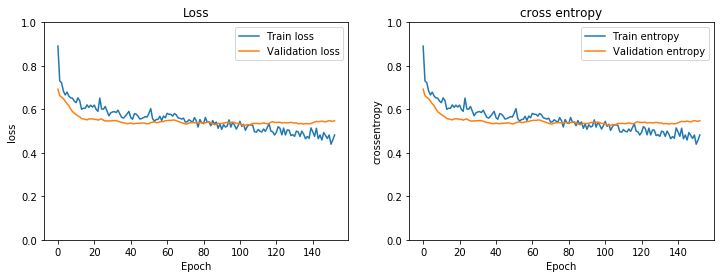

In [426]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Validation loss')
    plt.ylim([0,1])
    plt.title('Loss')
    plt.legend()
    
    plt.subplot(122)
    plt.xlabel('Epoch')
    plt.ylabel('crossentropy')
    plt.plot(hist['epoch'], hist['binary_crossentropy'], label='Train entropy')
    plt.plot(hist['epoch'], hist['val_binary_crossentropy'], label = 'Validation entropy')
    plt.title('cross entropy')
    plt.ylim([0,1])
    plt.legend()
   
    plt.savefig('cns_simple/loss.png')
    plt.show()
    

plot_history(history)

In [409]:
normed_all = np.concatenate((normed_train_data, normed_test_data))
label_all = np.concatenate((train_labels, test_labels))
print(len(normed_all[0]))
#predictions = model.predict(normed_test_data)
#aaa = pd.DataFrame([predictions,test_labels])
aa2 =  model.evaluate(normed_all, label_all)

12
663/663 [==============================] - 0s 129us/step


In [410]:
print('the prediction accuracy on the test data is: ',aa2[1]*100,'%')

the prediction accuracy on the test data is:  79.93966814799187 %


# Confusion map and ROC curve

1. calculate True Positive/ Negative; False Positive/ Negative
2. plot, plt maybe


In [417]:
# TP, TN; FP, FN
predict = new_model.predict(normed_all)
print(predict.shape)
print(label_all.shape)
predict_value  = predict.reshape(label_all.shape)

(663, 1)
(663,)


In [427]:
def calc_confusion_matrix(model, normed_all, label_all, cutoff):
    # cutoff may leads to ROC curve;
    predict = model.predict(normed_all)
    predict_value  = predict.reshape(label_all.shape)
                                #     0:  1:
    conf_mat = np.zeros((2,2))  # 0: [FP,TP];
                                # 1: [TN,FN]  
    
    for i in range(len(predict_value)):
        p = predict_value[i]
        cns = label_all[i]
        if (p >= cutoff) & (cns >= cutoff):
            conf_mat[0,1] += 1    # true positive
        elif (p >= cutoff) & (cns < cutoff):
            conf_mat[0,0] += 1    # false positive
        elif (p < cutoff) & (cns >= cutoff):
            conf_mat[1,1] += 1    # false negative
        elif (p < cutoff) & (cns < cutoff):
            conf_mat[1,0] += 1    # true negative
        else:
            print('error appear at # ', i)
    # TPR = TP/(TP + FN)
    TPR = conf_mat[0,1]/(conf_mat[0,1] + conf_mat[1,1])
    # FPR = FP/(FP + TN)
    FPR = conf_mat[0,0]/(conf_mat[0,0] + conf_mat[1,0])
    
    accu = (conf_mat[0,1] + conf_mat[1,0])/663
    return conf_mat, TPR, FPR, accu

In [472]:
conf_mat, TPR, FPR, ACCU = calc_confusion_matrix(model, normed_all, label_all, cutoffs[23])

In [473]:
TPR, FPR, ACCU

(0.7306397306397306, 0.13387978142076504, 0.8054298642533937)

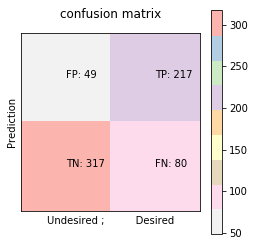

In [469]:
def plot_conf_mat(conf_mat):
    plt.matshow(conf_mat,cmap=plt.cm.Pastel1_r)
    plt.colorbar()
    plt.xlabel('Undesired ;          Desired'), plt.ylabel('Prediction')
    plt.xticks([]), plt.yticks([])
    plt.annotate('TN: '+str(int(conf_mat[1,0])),([0,1])), plt.annotate('FN: '+str(int(conf_mat[1,1])),([1,1]))
    plt.annotate('TP: '+str(int(conf_mat[0,1])),([1,0])), plt.annotate('FP: '+str(int(conf_mat[0,0])),([0,0]))
    plt.title('confusion matrix')
    plt.savefig('cns_simple/confsusion_matrix.png')
plot_conf_mat(conf_mat)    

# ROC

In [449]:
cutoffs = np.linspace(1e-10,1,50)
tpr = np.zeros(len(cutoffs))
fpr = np.zeros(len(cutoffs))
accus = np.zeros(len(cutoffs))
for i in range(len(cutoffs)):
    conf_mat, TPR, FPR, accu = calc_confusion_matrix(model, normed_all, label_all, cutoffs[i])
    tpr[i], fpr[i], accus[i] = TPR, FPR, accu

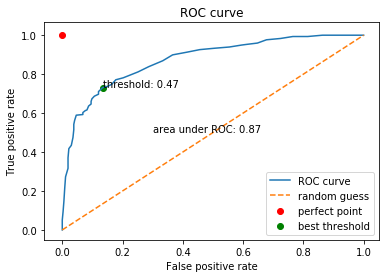

In [459]:
roc_s =  - np.trapz(tpr, fpr)
plt.plot(fpr, tpr,label='ROC curve')
plt.plot([0,1],[0,1],'--',label='random guess')  # diagonal lines
plt.scatter([0],[1], c ='r',label='perfect point')  # ideal classifier
plt.scatter(fpr[23],tpr[23], c ='green',label='best threshold')

plt.xlabel('False positive rate'), plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.annotate('area under ROC: '+str(round(roc_s, 2)), (.3, .5) )
plt.annotate('threshold: '+str(round(cutoffs[23], 2)), (fpr[23],tpr[23]) )
plt.legend()
plt.savefig('cns_simple/roc_curve.png')
plt.show()

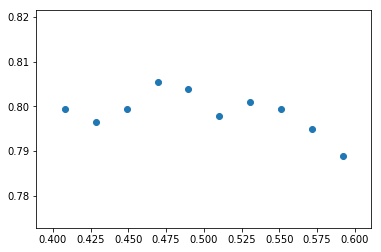

In [434]:
plt.scatter(cutoffs[20:30], accus[20:30])

#plt.plot
plt.show()

In [466]:
np.argmax(accus)

23

In [436]:
accus[23]

0.8054298642533937

In [504]:
model.predict(normed_test_data[0:1])

array([[0.2782358]], dtype=float32)

In [491]:
a = np.zeros(25)
list(a)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [495]:
a = np.ndarray(list(a))

TypeError: 'numpy.float64' object cannot be interpreted as an integer